# データ可視化によるデータ性状の理解

1. データを観察することで、どのような解析が望ましいか事前に理解する

In [1]:
from sklearn.datasets import load_boston
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 

In [2]:
mpl.rcParams['font.family'] = 'MS Gothic'

In [3]:
data = load_boston()

In [4]:
names = data['feature_names']
y = data['target']
X = data['data']
print(X.shape, y.shape)

(506, 13) (506,)


In [5]:
df = pd.DataFrame(X, columns=names)

In [6]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
312,0.26169,0.0,9.90,0.0,0.544,6.023,90.4,2.8340,4.0,304.0,18.4,396.30,11.72
375,19.60910,0.0,18.10,0.0,0.671,7.313,97.9,1.3163,24.0,666.0,20.2,396.90,13.44
245,0.19133,22.0,5.86,0.0,0.431,5.605,70.2,7.9549,7.0,330.0,19.1,389.13,18.46
432,6.44405,0.0,18.10,0.0,0.584,6.425,74.8,2.2004,24.0,666.0,20.2,97.95,12.03
48,0.25387,0.0,6.91,0.0,0.448,5.399,95.3,5.8700,3.0,233.0,17.9,396.90,30.81


In [7]:
df['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [8]:
pd.crosstab(df['CHAS'], df['TAX'])

TAX,187.0,188.0,193.0,198.0,216.0,222.0,223.0,224.0,226.0,233.0,...,402.0,403.0,411.0,422.0,430.0,432.0,437.0,469.0,666.0,711.0
CHAS,,,,,,,,,,,,,,,,,,,,,
0.0,1,7,8,0,4,7,3,10,1,9,...,2,23,2,1,3,9,15,1,124,5
1.0,0,0,0,1,1,0,2,0,0,0,...,0,7,0,0,0,0,0,0,8,0


findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.
/home/tatsu/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tatsu/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 29694 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tatsu/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38971 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tatsu/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/tatsu/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 20986 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/tatsu/.local/lib/python3.

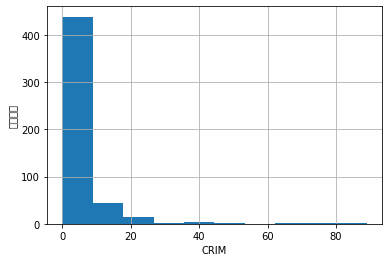

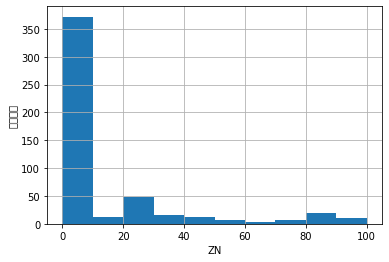

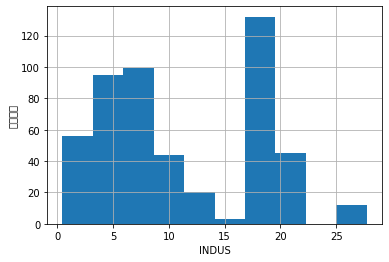

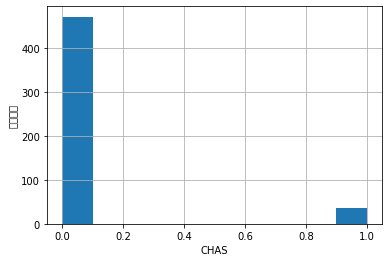

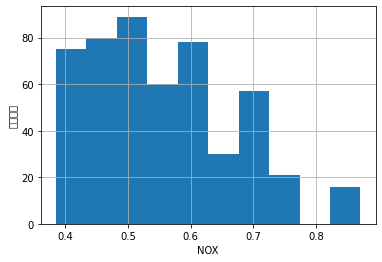

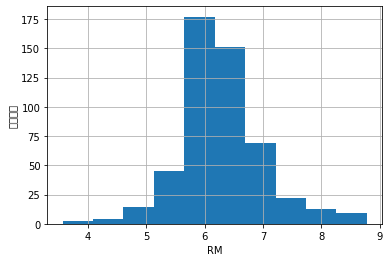

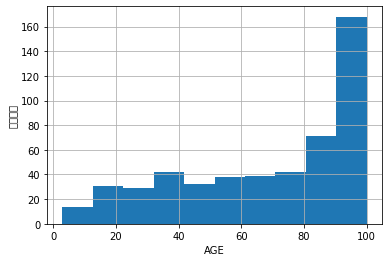

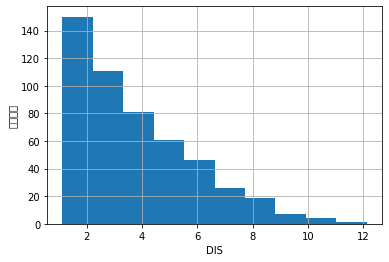

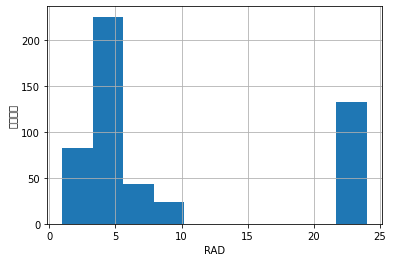

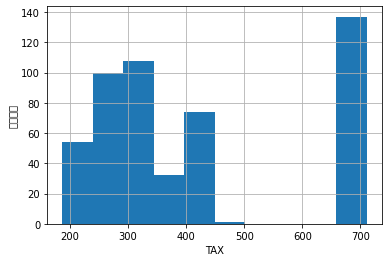

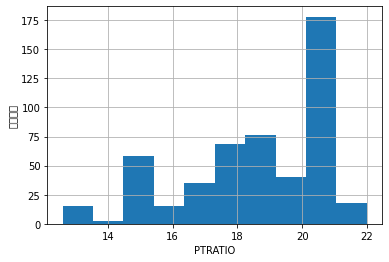

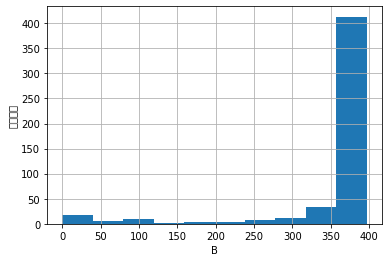

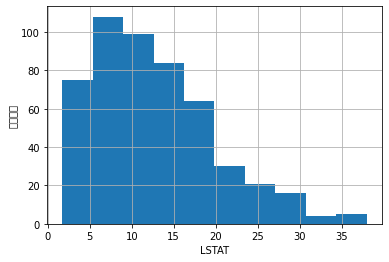

In [9]:
for name in df.columns:
    df[name].hist()
    plt.xlabel(name)
    plt.ylabel('出現頻度')
    plt.show()

In [10]:
mpl.rcParams['font.size'] = 25
mpl.rcParams['figure.figsize'] = [10, 10]

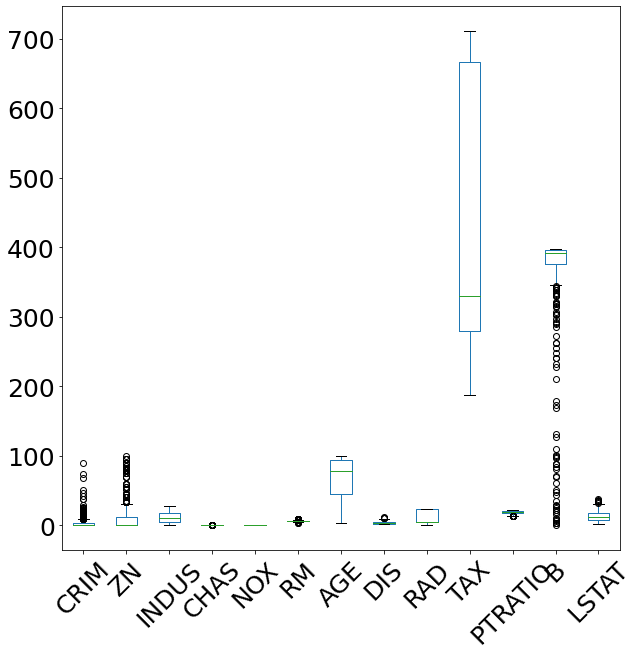

In [13]:
df.plot.box(rot=45)
plt.savefig('../results/eda/boston_boxplot.png')

In [ ]:
from pandas.plotting import scatter_matrix

[Scatter matrix](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html?highlight=visualization#scatter-matrix-plot)

In [ ]:
TARGET=['INDUS','NOX','RM','AGE','DIS','RAD','LSTAT']

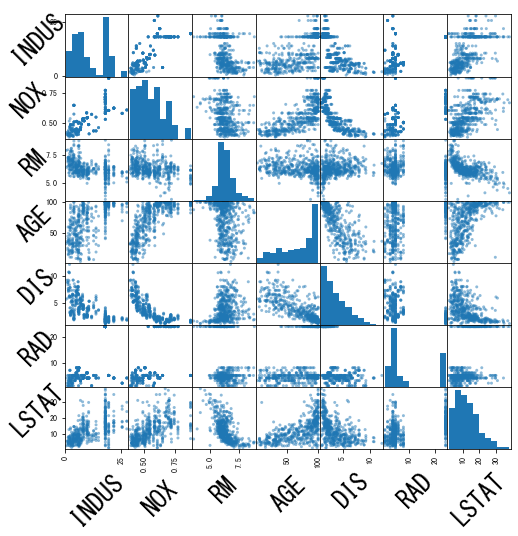

In [ ]:
sm = scatter_matrix(df[TARGET], figsize=(8,8));
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]

plt.savefig('../results/eda/boston_scattermat.png')

## 化合物データに対する可視化

- RDKit記述子の傾向を見てみる

In [ ]:
import pandas as pd 
df = pd.read_csv('../data/delaney-solubility/delaney-processed.csv')
df.head(3)

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)


In [ ]:
from rdkit import Chem 
import rdkit
rdkit.__version__

RDKit WARNING: [12:02:39] Enabling RDKit 2019.09.3 jupyter extensions


'2019.09.3'

In [ ]:
df['mol']=df['smiles'].apply(Chem.MolFromSmiles)

In [ ]:
import numpy as np 
from rdkit.Chem.Descriptors import descList

In [ ]:
names = list(dict(descList).keys())

In [ ]:
df_rdkit = pd.DataFrame([list(map(lambda f:f(m), list(dict(descList).values())))
               for m in df['mol']], columns=names)

In [ ]:
is_selected = np.logical_and(df_rdkit.var()>0, df_rdkit.var() <= 100)

TARGET = is_selected.keys().tolist()[:10]

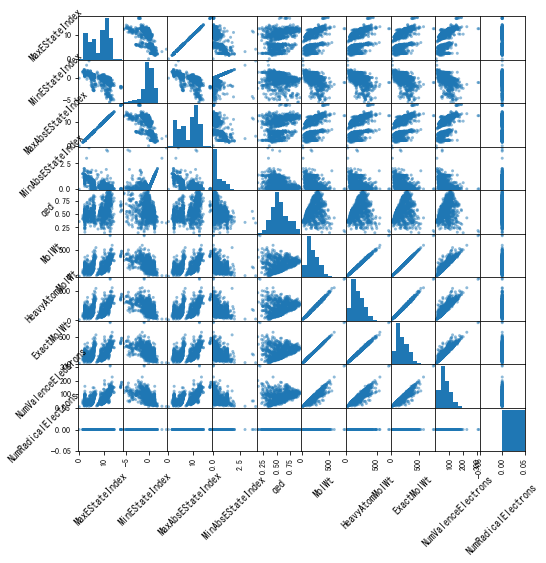

In [ ]:
sm = scatter_matrix(df_rdkit[TARGET], figsize=(8,8));

[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(45) for s in sm.reshape(-1)]

plt.savefig('../results/eda/rdkit_scatter_mat.png')

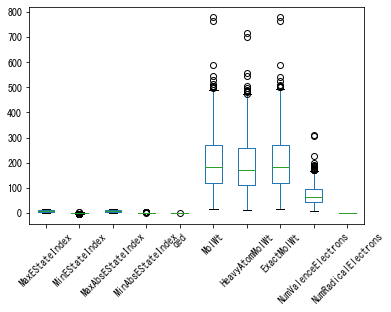

In [ ]:
df_rdkit[TARGET].plot.box(rot=45)
plt.savefig('../results/eda/rdkit_box.png')